### Identifying Quora duplicate question pairs

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

The spread of duplicate and non-duplicate questions.

In [3]:
print(os.getcwd())
df_train = pd.read_csv('./input/train.csv')
df_train.head()
df_train['is_duplicate'].describe()

/Users/Buddhika/Desktop/research/quora_competition


count    404290.000000
mean          0.369198
std           0.482588
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_duplicate, dtype: float64

In the training dataset, 36.9% are duplicate questions.

In [4]:
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
vs = qids.value_counts()
vs.head()
#print(vs[vs[1] > 50])

2559     157
30782    120
4044     111
2561      88
14376     79
dtype: int64

In [5]:
from sklearn.metrics import log_loss

p = df_train['is_duplicate'].mean() # Our predicted probability
print('Predicted score:', log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p))

Predicted score: 0.658527383984


(-0.5, 1439.5, 1079.5, -0.5)

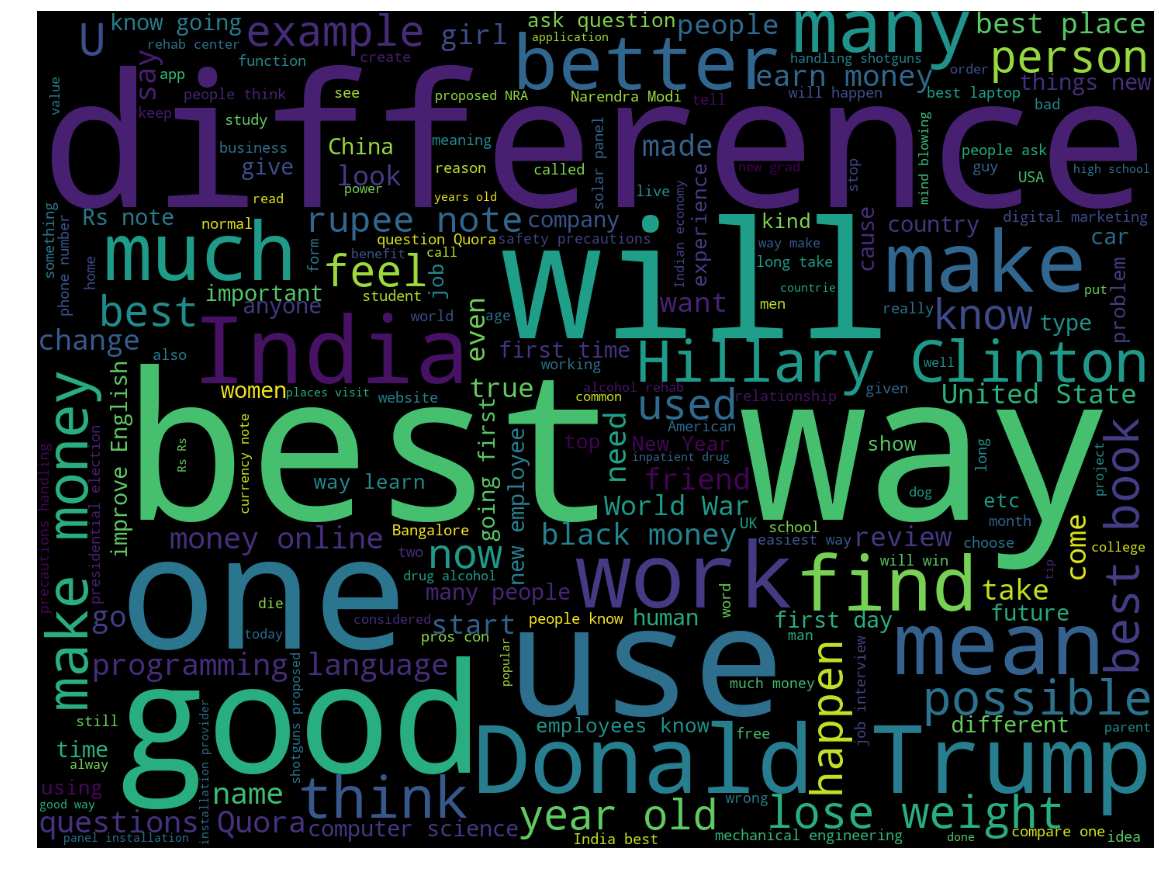

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

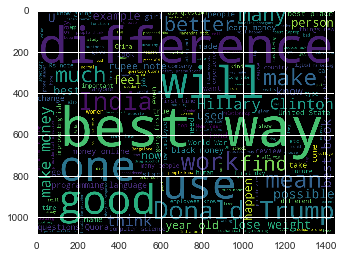

In [7]:
#import seaborn as sns
#%matplotlib inline

plt.imshow(cloud)

In [11]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

plt.figure(figsize=(15, 5))
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, normed=True)
duplicates = train_word_match[df_train['is_duplicate'] == 1]

plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

404290